# Tugas Besar - IF2220 - Probabilitas dan Statistika

## Soal

Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar IF2220. Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom sebagai berikut:
1. id
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas

Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut:

### 1.Menulis deskripsi statistika (Descriptive Statistics) 
dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
namaKolom = ['id','Daerah','SumbuUtama','SumbuKecil','Keunikan','AreaBulatan','Diameter','KadarAir','Keliling','Bulatan','Ransum','Kelas']
gandum = pd.read_csv("Gandum.csv", names = namaKolom)
gandum.head()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
4,5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1


In [3]:
print("------------- Mean -------------")
print(gandum.mean(numeric_only=True))
print("\n\n")
print("------------- Median -------------")
print(gandum.median(numeric_only=True))
#asumsi NaN tidak bisa menjadi mode
print("\n\n")
print("------------- Mode -------------")
print(gandum.mode(numeric_only=True, dropna=True))
print("\n\n")
print("------------- Std. Deviasi -------------")
print(gandum.std(numeric_only=True))
print("\n\n")
print("------------- Varians -------------")
print(gandum.var(numeric_only=True))
print("\n\n")
print("------------- Range -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["max"] - gandum_Describe[column]["min"])
print("\n\n")
print("------------- Minimum -------------")
print(gandum.min(numeric_only=True))
print("\n\n")
print("------------- Maksimum -------------")
print(gandum.max(numeric_only=True))
print("\n\n")
print("------------- IQR -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["75%"] - gandum_Describe[column]["25%"])
print("\n\n")
print("------------- Skewness -------------")
print(gandum.skew(numeric_only=True))
print("\n\n")
print("------------- Kurtosis -------------")
print(gandum.kurtosis(numeric_only=True))
print("\n\n")

------------- Mean -------------
id              250.500000
Daerah         4801.246000
SumbuUtama      116.045171
SumbuKecil       53.715246
Keunikan          0.878764
AreaBulatan    4937.048000
Diameter         77.771158
KadarAir          0.648372
Keliling        281.479722
Bulatan           0.761737
Ransum            2.150915
Kelas             1.502000
dtype: float64



------------- Median -------------
id              250.500000
Daerah         4735.000000
SumbuUtama      115.405140
SumbuKecil       53.731199
Keunikan          0.890045
AreaBulatan    4857.000000
Diameter         77.645277
KadarAir          0.626117
Keliling        280.045500
Bulatan           0.761288
Ransum            2.193599
Kelas             2.000000
dtype: float64



------------- Mode -------------
      id  Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan   Diameter  \
0      1  3992.0   74.133114   39.906517  0.719916       3802.0  71.293564   
1      2  4881.0   74.364021   41.436419  0.725553       49

In [4]:
print("------------- Kuartil -------------")
gandum.describe().loc[['25%','50%','75%']]

------------- Kuartil -------------


,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
25%,125.75,4042.75,104.116098,51.193576,0.863676,4170.25,71.745308,0.572632,255.8830,0.731991,1.983939,1.0
50%,250.50,4735.00,115.405140,53.731199,0.890045,4857.00,77.645277,0.626117,280.0455,0.761288,2.193599,2.0
75%,375.25,5495.50,129.046792,56.325158,0.907578,5654.25,83.648598,0.726633,306.0625,0.796361,2.381612,2.0


### 2. Membuat Visualisasi plot distribusi
dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

<b>Daerah</b>

Histogram menunjukkan diagram yang hampir normal meskipun sedikit skew positif. Karena itu, boxplot juga terlihat hampir simetris

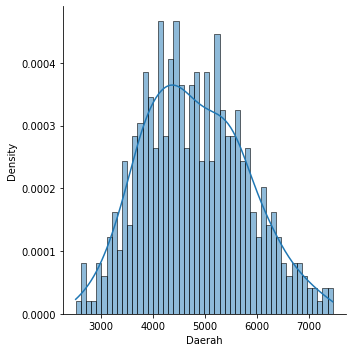

In [5]:
sns.displot(gandum["Daerah"], stat="density", kde=True, bins=50)
# gandum.hist("Daerah")

<AxesSubplot:>

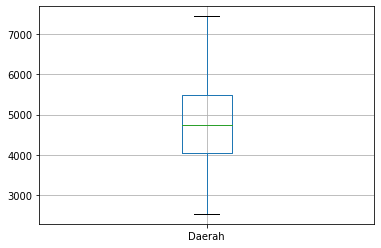

In [6]:
gandum.boxplot("Daerah")

<b>SumbuUtama</b>

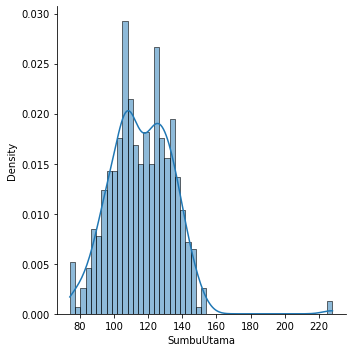

In [7]:
sns.displot(gandum["SumbuUtama"], stat="density", kde=True, bins=50)
# gandum["SumbuUtama"].hist(bins=15)

<AxesSubplot:>

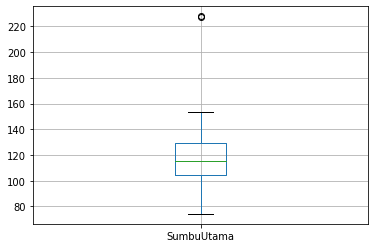

In [8]:
gandum.boxplot("SumbuUtama")

<b>SumbuKecil</b>

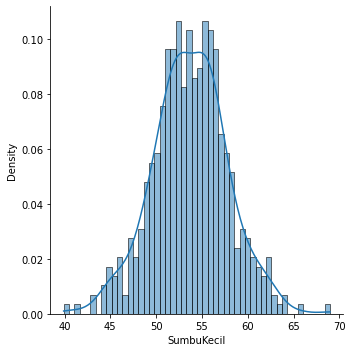

In [9]:
sns.displot(gandum["SumbuKecil"], stat="density", kde=True, bins=50)
# gandum["SumbuKecil"].hist(bins=15)

<AxesSubplot:>

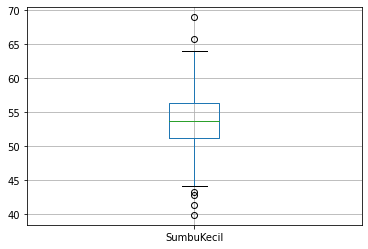

In [10]:
gandum.boxplot("SumbuKecil")

<b>Keunikan</b>

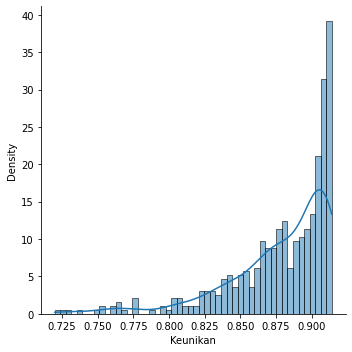

In [11]:
sns.displot(gandum["Keunikan"], stat="density", kde=True, bins=50)
# gandum["Keunikan"].hist(bins=15)

<AxesSubplot:>

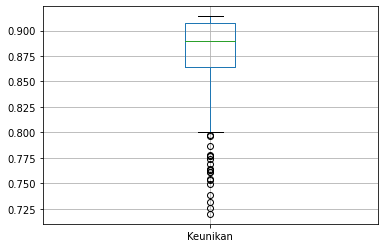

In [12]:
gandum.boxplot("Keunikan")

<b>AreaBulatan</b>

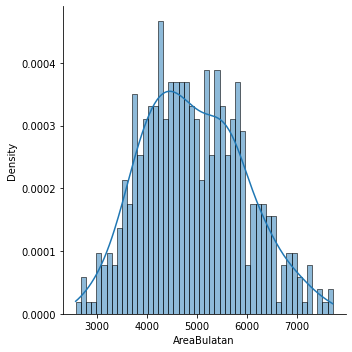

In [13]:
sns.displot(gandum["AreaBulatan"], stat="density", kde=True, bins=50)
# gandum["AreaBulatan"].hist(bins=15)

<AxesSubplot:>

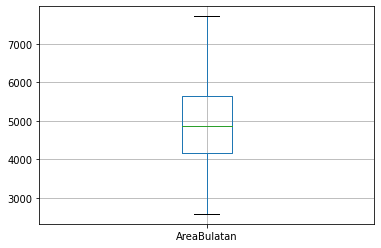

In [14]:
gandum.boxplot("AreaBulatan")

<b>Diameter</b>

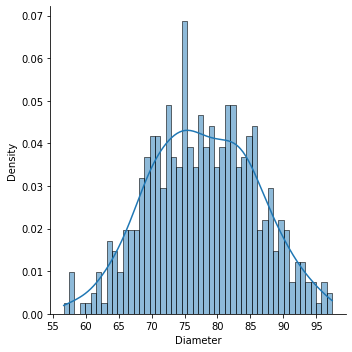

In [15]:
sns.displot(gandum["Diameter"], stat="density", kde=True, bins=50)
# gandum["Diameter"].hist(bins=20)

<AxesSubplot:>

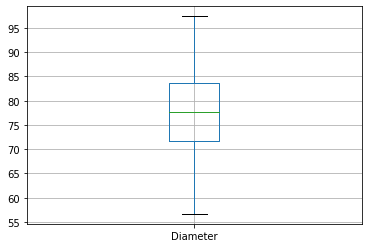

In [16]:
gandum.boxplot("Diameter")

<b>KadarAir</b>

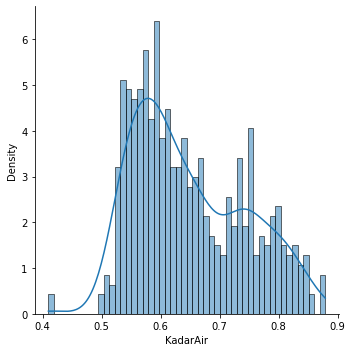

In [17]:
sns.displot(gandum["KadarAir"], stat="density", kde=True, bins=50)
# gandum["KadarAir"].hist(bins=20)

<AxesSubplot:>

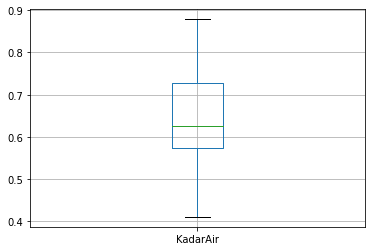

In [18]:
gandum.boxplot("KadarAir")

<b>Keliling</b>

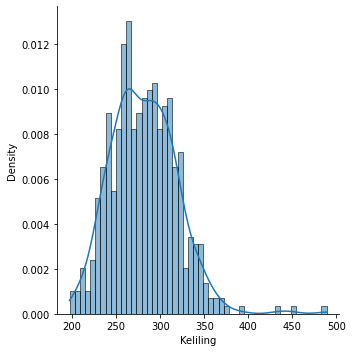

In [19]:
sns.displot(gandum["Keliling"], stat="density", kde=True, bins=50)
# gandum["Keliling"].hist()

<AxesSubplot:>

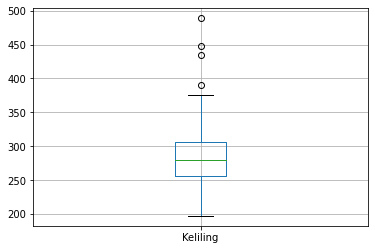

In [20]:
gandum.boxplot("Keliling")

<b>Bulatan</b>

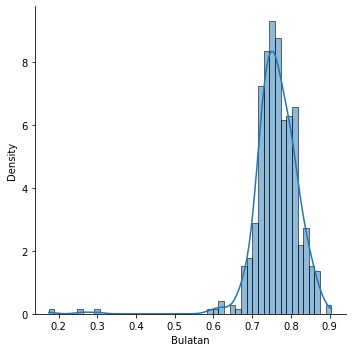

In [21]:
sns.displot(gandum["Bulatan"], stat="density", kde=True, bins=50)
# gandum["Bulatan"].hist()

<AxesSubplot:>

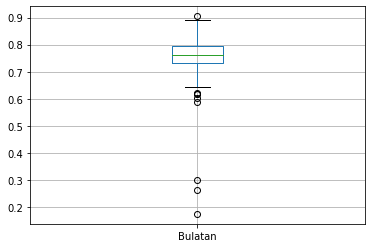

In [22]:
gandum.boxplot("Bulatan")

<b>Ransum</b>

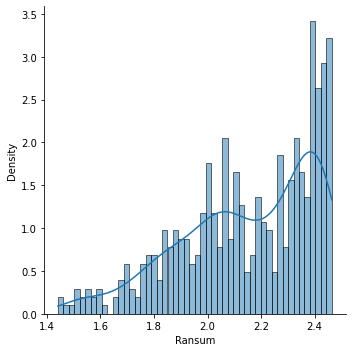

In [23]:
sns.displot(gandum["Ransum"], stat="density", kde=True, bins=50)
# gandum["Ransum"].hist()

<AxesSubplot:>

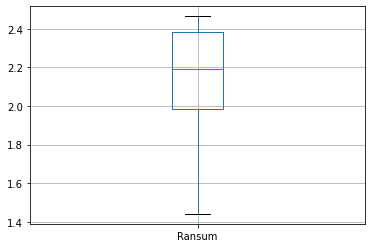

In [24]:
gandum.boxplot("Ransum")

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak
Berdasarkan penggambaran histogram yang sudah dilakukan:

**Daerah** tidak berdistribusi normal

**SumbuUtama** tidak berdistribusi normal

**SumbuKecil** berdistribusi normal

**Keunikan** tidak berdistribusi normal

**AreaBulatan** tidak berdistribusi normal

**Diameter** berdistribusi normal

**KadarAir** tidak berdistribusi normal

**Keliling** tidak berdistribusi normal

**Bulatan** berdistribusi normal

**Ransum** tidak berdistribusi normal


### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing
   menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.<br>

aaaa


<AxesSubplot:>

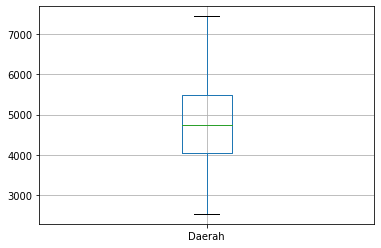

In [34]:
# 4a. Nilai rata-rata Daerah di atas 4700?
# 1) null hypothesis : mean = 4700
# 2) alternative hypothesis : mean > 4700
# 3) alpha : 0.05
# 4) karena digunakan alpha = 0.05, daerah kritis: Z > 1.645
# 5) uji nilai tes statistik one tailed : 
# 	Z = (4801 - 4700)/(986.4/√500) = 2.29
# 	p-value = 1 - P(Z > 2.29) = 1 - 0.9890
# 			= 0.0110
# 6)nilai Z berada pada daerah kritis dan p-value lebih kecil dari alpha, maka tolak null hypothesis

#boxplot
gandum.boxplot("Daerah")

<AxesSubplot:>

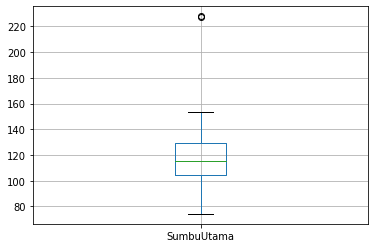

In [37]:
# 4b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
# 1) null hypothesis : mean = 116
# 2) alternative hypothesis : mean ≠ 116
# 3) alpha : 0.05
# 4) digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed :
# 	Z = (116.045171 - 116)/(18.3/√500) = 0.0552
# 	p-value : 2*P(Z < -0.552) = 0.9562
# 6) nilai Z tidak berada pada daerah kritis dan p-value lebih besar dari alpha, maka gagal untuk menolak null hypothesis.

#BOXPLOT BELUM
gandum.boxplot("SumbuUtama")

Mean 20 pertama :  54.8872762605


<AxesSubplot:>

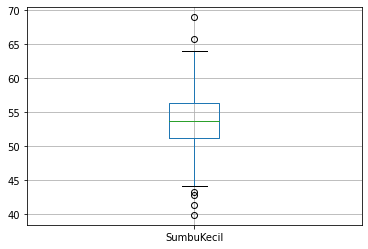

In [41]:
# 4c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
# diketahui dari data 20 pertama:
# mean = 54.887
# std = 3.373

# 1) null hypothesis : mean = 50
# 2) alternative hypothesis : mean ≠ 50
# 3) alpha = 0.05
# 4) digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed:
# 	Z = (54.887-50)/(4.071075/√20) = 5.36844
# 	p = 0 (mendekati)
# 6) nilai Z berada pada daerah kritis, maka null hypothesis ditolak

print("Mean 20 pertama : ",gandum["SumbuKecil"].loc[:19].mean())
gandum.boxplot("SumbuKecil")

Jumlah diameter gandum yang lebih dari 85 : 97


<AxesSubplot:>

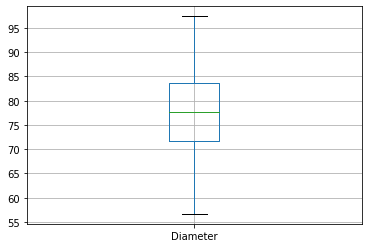

In [44]:
# 4d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
# 1) null hypothesis : P = 0.15
# 2) alternative hypothesis : P ≠ 0.15
# 3) alpha = 0.05
# 4) digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed:
# 	Z = 0.194-0.15/(√0.15*0.85/500) = 2.755
# 	p = 2(P<-2.755) = 0.00587
# 6) nilai Z berada pada daerah kritis, maka null hypothesis ditolak
print("Jumlah diameter gandum yang lebih dari 85 : ", end="")
print(len(gandum["Diameter"].loc[gandum["Diameter"] > 85]))
gandum.boxplot("Diameter")

Jumlah nilai keliling yang kurang dari 100 : 0


<AxesSubplot:>

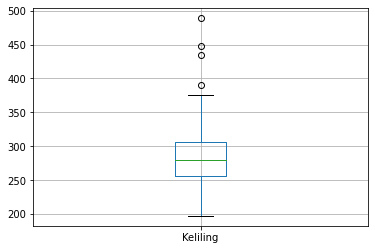

In [45]:
# 4e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?
# 1) null hypothesis : P = 0.05
# 2) alternative hypothesis : P < 0.05
# 3) alpha = 0.05
# 4) digunakan alpha = 0.05 dan statistik one tailed
# 	maka daerah kritis: Z < -1.645
# 5) uji nilai statistik one tailed:
# 	Z = 0-0.05/(√0.05*0.95/500) = -5.130
# 	p = 0 (mendekati)
# 6) nilai Z berada pada daerah kritis, maka null hypothesis ditolak
print("Jumlah nilai keliling yang kurang dari 100 : ", end="")
print(len(gandum["Keliling"].loc[gandum["Keliling"] < 100]))
gandum.boxplot("Keliling")

### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing 
menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
<ul>
    <li>Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?</li>
    <li>Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?</li>
    <li>Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?</li>
    <li>Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?</li>
    <li>Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?</li>
</ul>

In [27]:
# testing
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 20, 22, 18]}
df = pd.DataFrame(data)
df_1 = df.iloc[:df['Age'].count()//2,:]
df_2 = df.iloc[-3:,:]
display(df)
display(df_1)
display(df_2)
# print(df_1['Age'].mean())
# print(df_2['Age'].mean())

,Name,Age
0,Tom,20
1,nick,20
2,krish,22
3,jack,18


,Name,Age
0,Tom,20
1,nick,20


,Name,Age
1,nick,20
2,krish,22
3,jack,18


In [28]:
# Membagi dataframe menjadi 2 bagian sama panjang
AreaBulatan1 = gandum.iloc[:gandum['AreaBulatan'].count()//2,:]
AreaBulatan2 = gandum.iloc[gandum['AreaBulatan'].count()//2:,:]
print("Rata-rata")
print("AreaBulatan bagian awal = " + str(AreaBulatan1['AreaBulatan'].mean()))
print("AreaBulatan bagian akhir = " + str(AreaBulatan2['AreaBulatan'].mean()))

Rata-rata
AreaBulatan bagian awal = 5549.804
AreaBulatan bagian akhir = 4324.292


In [29]:
# Membagi dataframe menjadi 2 bagian sama panjang
KadarAir1 = gandum.iloc[:gandum['KadarAir'].count()//2,:]
KadarAir2 = gandum.iloc[gandum['KadarAir'].count()//2:,:]
print("Rata-rata")
print("KadarAir bagian awal = " + str(KadarAir1['KadarAir'].mean()))
print("KadarAir bagian akhir = " + str(KadarAir2['KadarAir'].mean()))

Rata-rata
KadarAir bagian awal = 0.63574344072
KadarAir bagian akhir = 0.660999903076


In [30]:
print("Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?")
Bulatan1 = gandum.iloc[:20,:]
Bulatan2 = gandum.iloc[-20:,:]
print("Rata-rata")
print("Bulatan bagian awal = " + str(Bulatan1['Bulatan'].mean()))
print("Bulatan bagian akhir = " + str(Bulatan2['Bulatan'].mean()))

Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
Rata-rata
Bulatan bagian awal = 0.73753535525
Bulatan bagian akhir = 0.767322437


In [31]:
print("Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?")

Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?


In [32]:
print("Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?")
Diameter1 = gandum.iloc[:gandum['Diameter'].count()//2,:]
Diameter2 = gandum.iloc[gandum['Diameter'].count()//2:,:]
print("Variansi")
print("Diameter bagian awal = " + str(Diameter1['Diameter'].var()))
print("Diameter bagian akhir = " + str(Diameter2['Diameter'].var()))

Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?
Variansi
Diameter bagian awal = 43.168980426322435
Diameter bagian akhir = 39.8282643880772


### 6. Test korelasi
tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Hasil korelasi kolom non-target dengan kolom Kelas(target)
Daerah        -0.602747
SumbuUtama    -0.713091
SumbuKecil    -0.152975
Keunikan      -0.730456
AreaBulatan   -0.607313
Diameter      -0.602536
KadarAir       0.134344
Keliling      -0.634861
Bulatan        0.545005
Ransum        -0.839904
dtype: float64


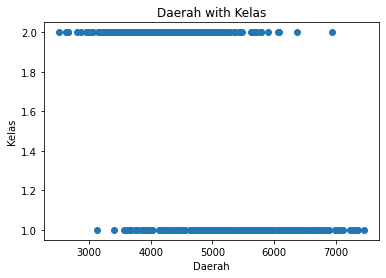

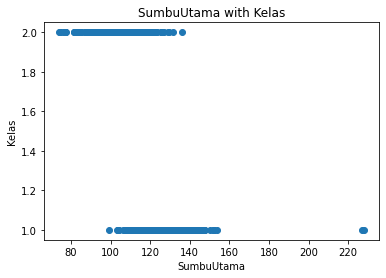

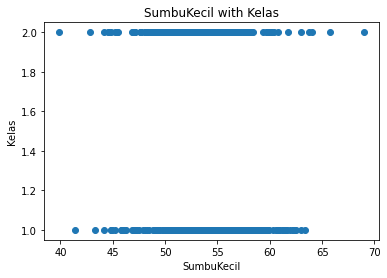

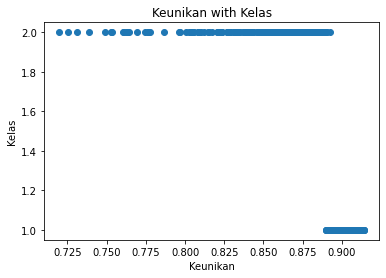

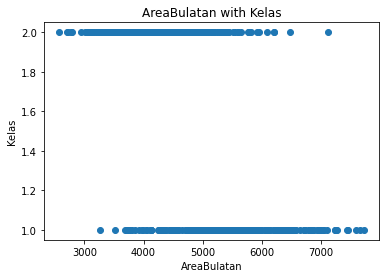

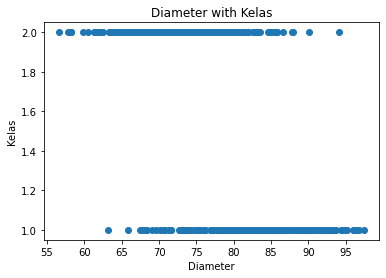

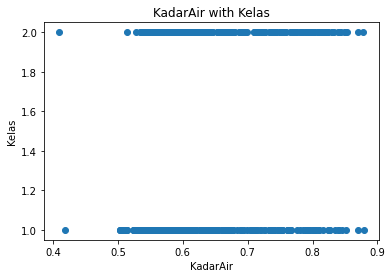

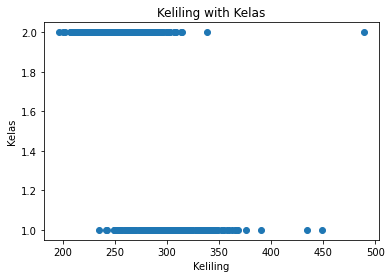

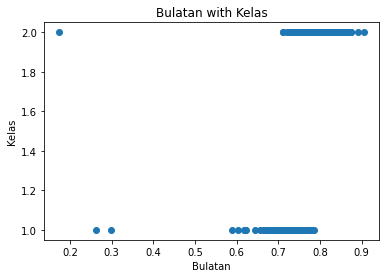

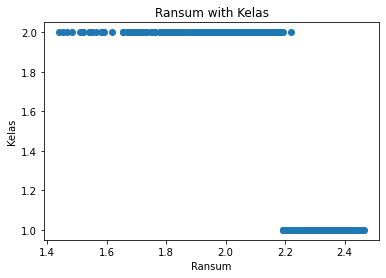

In [33]:
nonTarget = gandum[['Daerah','SumbuUtama','SumbuKecil','Keunikan','AreaBulatan','Diameter','KadarAir','Keliling','Bulatan','Ransum']]
target = gandum['Kelas']
print("Hasil korelasi kolom non-target dengan kolom Kelas(target)")
print(nonTarget.corrwith(target))
for column in nonTarget:
    plt.title(f"{column} with Kelas")
    plt.scatter(x=gandum[column],y=target)
    plt.xlabel(f"{column}")
    plt.ylabel("Kelas")
    plt.show()